## Importing data

In [1]:
# import packages
import GEOparse
import numpy as np
import pandas as pd
import scanpy as sc
import scipy as sp
import anndata
import matplotlib
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import seaborn as sns
import scanpy.external as sce
#from MulticoreTSNE import MulticoreTSNE as TSNE

In [3]:
gse = GEOparse.get_GEO(geo = "GSE148611", destdir = "./")
samples = list(gse.gsms.keys())
samples_dict = {'GSM4475127': 'Female_Saline_1',
           'GSM4475128': 'Male_Saline_1',
           'GSM4475129': 'Female_Saline_2',
           'GSM4475130': 'Male_Saline_2',
           'GSM4475131': 'Female_Saline_3',
           'GSM4475132': 'Male_Saline_3',
           'GSM4475133': 'Female_LPS_1',
           'GSM4475134': 'Male_LPS_1',
           'GSM4475135': 'Female_LPS_2',
           'GSM4475136': 'Male_LPS_2',
           'GSM4475137': 'Female_LPS_3',
           'GSM4475138': 'Male_LPS_3'
          }
sample_labels = list(samples_dict.values())

07-Apr-2022 09:36:38 DEBUG utils - Directory ./ already exists. Skipping.
07-Apr-2022 09:36:38 INFO GEOparse - File already exist: using local version.
07-Apr-2022 09:36:38 INFO GEOparse - Parsing ./GSE148611_family.soft.gz: 
07-Apr-2022 09:36:38 DEBUG GEOparse - DATABASE: GeoMiame
07-Apr-2022 09:36:38 DEBUG GEOparse - SERIES: GSE148611
07-Apr-2022 09:36:38 DEBUG GEOparse - PLATFORM: GPL24247
07-Apr-2022 09:36:38 DEBUG GEOparse - SAMPLE: GSM4475127
07-Apr-2022 09:36:38 DEBUG GEOparse - SAMPLE: GSM4475128
07-Apr-2022 09:36:38 DEBUG GEOparse - SAMPLE: GSM4475129
07-Apr-2022 09:36:38 DEBUG GEOparse - SAMPLE: GSM4475130
07-Apr-2022 09:36:38 DEBUG GEOparse - SAMPLE: GSM4475131
07-Apr-2022 09:36:38 DEBUG GEOparse - SAMPLE: GSM4475132
07-Apr-2022 09:36:38 DEBUG GEOparse - SAMPLE: GSM4475133
07-Apr-2022 09:36:38 DEBUG GEOparse - SAMPLE: GSM4475134
07-Apr-2022 09:36:38 DEBUG GEOparse - SAMPLE: GSM4475135
07-Apr-2022 09:36:38 DEBUG GEOparse - SAMPLE: GSM4475136
07-Apr-2022 09:36:38 DEBUG GEOpars

In [4]:
path = '/Users/Joyce/Documents/COLUMBIA/COLUMBIA MS/BMEN4480/Final Project/GSE148611_RAW'

In [5]:
# 12 samples
adata1 = sc.read_10x_mtx(f'{path}/{samples[0]}',var_names='gene_symbols',cache = True)
adata2 = sc.read_10x_mtx(f'{path}/{samples[1]}',var_names='gene_symbols',cache = True)
adata3 = sc.read_10x_mtx(f'{path}/{samples[2]}',var_names='gene_symbols',cache = True)
adata4 = sc.read_10x_mtx(f'{path}/{samples[3]}',var_names='gene_symbols',cache = True)
adata5 = sc.read_10x_mtx(f'{path}/{samples[4]}',var_names='gene_symbols',cache = True)
adata6 = sc.read_10x_mtx(f'{path}/{samples[5]}',var_names='gene_symbols',cache = True)
adata7 = sc.read_10x_mtx(f'{path}/{samples[6]}',var_names='gene_symbols',cache = True)
adata8 = sc.read_10x_mtx(f'{path}/{samples[7]}',var_names='gene_symbols',cache = True)
adata9 = sc.read_10x_mtx(f'{path}/{samples[8]}',var_names='gene_symbols',cache = True)
adata10 = sc.read_10x_mtx(f'{path}/{samples[9]}',var_names='gene_symbols',cache = True)
adata11 = sc.read_10x_mtx(f'{path}/{samples[10]}',var_names='gene_symbols',cache = True)
adata12 = sc.read_10x_mtx(f'{path}/{samples[11]}',var_names='gene_symbols',cache = True)

In [6]:
# annotate as either saline or lps
adata1.obs['group'] = 'saline'
adata2.obs['group'] = 'saline'
adata3.obs['group'] = 'saline'
adata4.obs['group'] = 'saline'
adata5.obs['group'] = 'saline'
adata6.obs['group'] = 'saline'
adata7.obs['group'] = 'lps'
adata8.obs['group'] = 'lps'
adata9.obs['group'] = 'lps'
adata10.obs['group'] = 'lps'
adata11.obs['group'] = 'lps'
adata12.obs['group'] = 'lps'

# annotate with sample labels
adata1.obs['sample'] = sample_labels[0]
adata2.obs['sample'] = sample_labels[1]
adata3.obs['sample'] = sample_labels[2]
adata4.obs['sample'] = sample_labels[3]
adata5.obs['sample'] = sample_labels[4]
adata6.obs['sample'] = sample_labels[5]
adata7.obs['sample'] = sample_labels[6]
adata8.obs['sample'] = sample_labels[7]
adata9.obs['sample'] = sample_labels[8]
adata10.obs['sample'] = sample_labels[9]
adata11.obs['sample'] = sample_labels[10]
adata12.obs['sample'] = sample_labels[11]

In [7]:
# concatenate
adata_astrocytes = adata1.concatenate(adata2,adata3,adata4,adata5,adata6,adata7,adata8,adata9,adata10,adata11,adata12)

In [8]:
adata_astrocytes

AnnData object with n_obs × n_vars = 116707 × 31053
    obs: 'group', 'sample', 'batch'
    var: 'gene_ids'

## Microglia

In [9]:
# read in genes by cells raw count data
adata_ctrl = sc.read_text('/Users/Joyce/Documents/COLUMBIA/COLUMBIA MS/BMEN4480/Final Project/GSE115571_RAW/GSM3182555_CTRL.txt', 
                          first_column_names = True)
adata_lps = sc.read_text('/Users/Joyce/Documents/COLUMBIA/COLUMBIA MS/BMEN4480/Final Project/GSE115571_RAW/GSM3182556_LPS.txt', 
                          first_column_names = True)

In [10]:
# transpose to cells x genes
adata_ctrl = adata_ctrl.transpose()
adata_lps = adata_lps.transpose()

In [11]:
# annotate as ctrl or lps
adata_ctrl.obs['sample'] = 'microglia_control'
adata_lps.obs['sample'] = 'microglia_lps'

In [12]:
# concatenate
adata_microglia = adata_ctrl.concatenate(adata_lps)

In [13]:
adata_microglia

AnnData object with n_obs × n_vars = 19998 × 14426
    obs: 'sample', 'batch'

In [14]:
adata = adata_astrocytes.concatenate(adata_microglia)

In [15]:
adata

AnnData object with n_obs × n_vars = 136705 × 12623
    obs: 'group', 'sample', 'batch'
    var: 'gene_ids-0'

## Batch Correction

## QC Filtering

In [16]:
sc.pp.calculate_qc_metrics(adata,expr_type='counts',inplace=True)

In [17]:
adata

AnnData object with n_obs × n_vars = 136705 × 12623
    obs: 'group', 'sample', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'
    var: 'gene_ids-0', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

<AxesSubplot:xlabel='log1p_total_counts', ylabel='Count'>

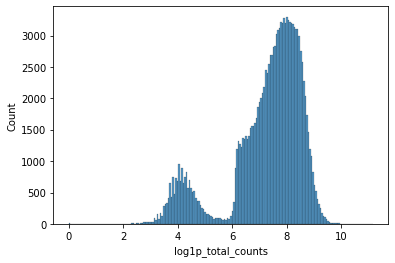

In [18]:
sns.histplot(adata.obs['log1p_total_counts'])

In [19]:
# filter out cells with less than 1000 counts & genes not expressed in at least 1 cell
#adata = adata[adata.obs.log1p_total_counts > 7, :]
#sc.pp.filter_genes(adata, min_cells = 20)

In [20]:
adata

AnnData object with n_obs × n_vars = 136705 × 12623
    obs: 'group', 'sample', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'
    var: 'gene_ids-0', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

... storing 'group' as categorical
... storing 'sample' as categorical


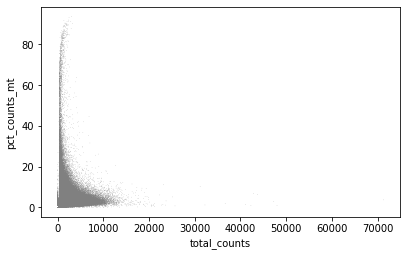

In [21]:
# remove cells with too many mitochondrial genes expressed
adata.var['mt'] = adata.var_names.str.startswith('mt-')
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
adata = adata[adata.obs.pct_counts_mt < 20, :]

In [22]:
adata

View of AnnData object with n_obs × n_vars = 132045 × 12623
    obs: 'group', 'sample', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids-0', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'mt'

In [23]:
# convert to dataframe
df = adata.to_df()

In [24]:
df.head()

,Xkr4,Mrpl15,Lypla1,Tcea1,Rgs20,Atp6v1h,Rb1cc1,4732440D04Rik,Pcmtd1,Gm26901,...,Csf2ra,Gm21060,mt-Nd1,mt-Nd2,mt-Co1,mt-Co3,mt-Nd4,mt-Nd5,mt-Nd6,mt-Cytb
AAACCTGAGGCTAGAC-1-0-0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,14.0,13.0,11.0,19.0,12.0,1.0,0.0,15.0
AAACCTGCAAGGACAC-1-0-0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,12.0,11.0,14.0,30.0,17.0,2.0,0.0,20.0
AAACCTGCACCTATCC-1-0-0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,16.0,6.0,33.0,58.0,25.0,2.0,0.0,35.0
AAACCTGGTAAGCACG-1-0-0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,21.0,12.0,34.0,40.0,20.0,3.0,0.0,30.0
AAACCTGGTTATGCGT-1-0-0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,18.0,10.0,14.0,34.0,18.0,1.0,0.0,32.0


## Normalization

In [25]:
# scale to CPM
sc.pp.normalize_total(adata, target_sum=1e6)

/Users/Joyce/opt/anaconda3/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [26]:
sc.pp.log1p(adata)

## Feature selection

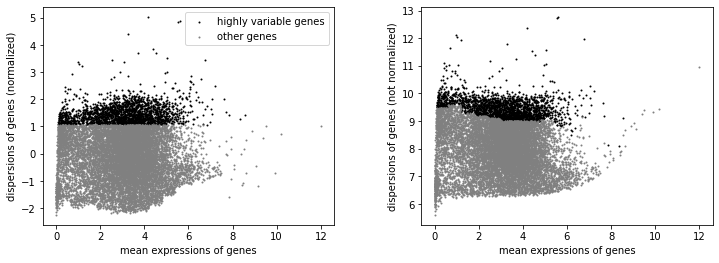

In [27]:
# top 2000 highly variable genes
sc.pp.highly_variable_genes(adata,n_top_genes=2000)
sc.pl.highly_variable_genes(adata)

## Dimensionality reduction and visualization

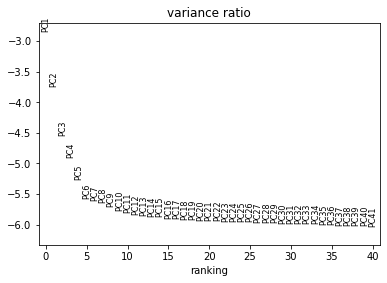

In [28]:
# PCA
sc.pp.pca(adata,use_highly_variable = True)

# PCA variance ratio
sc.pl.pca_variance_ratio(adata, n_pcs = 40, log = True)

In [29]:
adata.obs['sample']

AAACCTGAGGCTAGAC-1-0-0    Female_Saline_1
AAACCTGCAAGGACAC-1-0-0    Female_Saline_1
AAACCTGCACCTATCC-1-0-0    Female_Saline_1
AAACCTGGTAAGCACG-1-0-0    Female_Saline_1
AAACCTGGTTATGCGT-1-0-0    Female_Saline_1
                               ...       
AAATGTTAGCGC-1-1            microglia_lps
ACATGATCACAG-1-1            microglia_lps
ACCTGTCTTAAT-1-1            microglia_lps
AGGACTTCCACA-1-1            microglia_lps
CCAAACGATTAG-1-1            microglia_lps
Name: sample, Length: 132045, dtype: category
Categories (14, object): ['Female_LPS_1', 'Female_LPS_2', 'Female_LPS_3', 'Female_Saline_1', ..., 'Male_Saline_2', 'Male_Saline_3', 'microglia_control', 'microglia_lps']

In [34]:
pip install harmonypy

Note: you may need to restart the kernel to use updated packages.


In [35]:
sce.pp.harmony_integrate(adata, 'sample')

2022-04-07 10:26:58,821 - harmonypy - INFO - Iteration 1 of 10
2022-04-07 10:28:25,332 - harmonypy - INFO - Iteration 2 of 10
2022-04-07 10:29:50,374 - harmonypy - INFO - Iteration 3 of 10
2022-04-07 10:31:22,918 - harmonypy - INFO - Iteration 4 of 10
2022-04-07 10:32:46,568 - harmonypy - INFO - Iteration 5 of 10
2022-04-07 10:34:09,483 - harmonypy - INFO - Converged after 5 iterations


In [36]:
adata

AnnData object with n_obs × n_vars = 132045 × 12623
    obs: 'group', 'sample', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids-0', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'mt', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'tsne', 'sample_colors', 'neighbors', 'leiden', 'leiden_colors'
    obsm: 'X_pca', 'X_tsne', 'X_pca_harmony'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

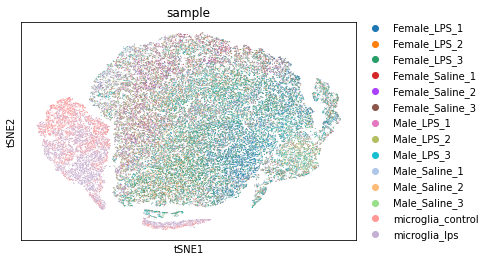

In [30]:
# tSNE on top 11 PCs
sc.tl.tsne(adata, 6)

# 2D tSNE embedding
sc.pl.tsne(adata, color = 'sample')

## Clustering

... storing 'kmeans2' as categorical
... storing 'kmeans3' as categorical
... storing 'kmeans4' as categorical
... storing 'kmeans5' as categorical
... storing 'kmeans6' as categorical


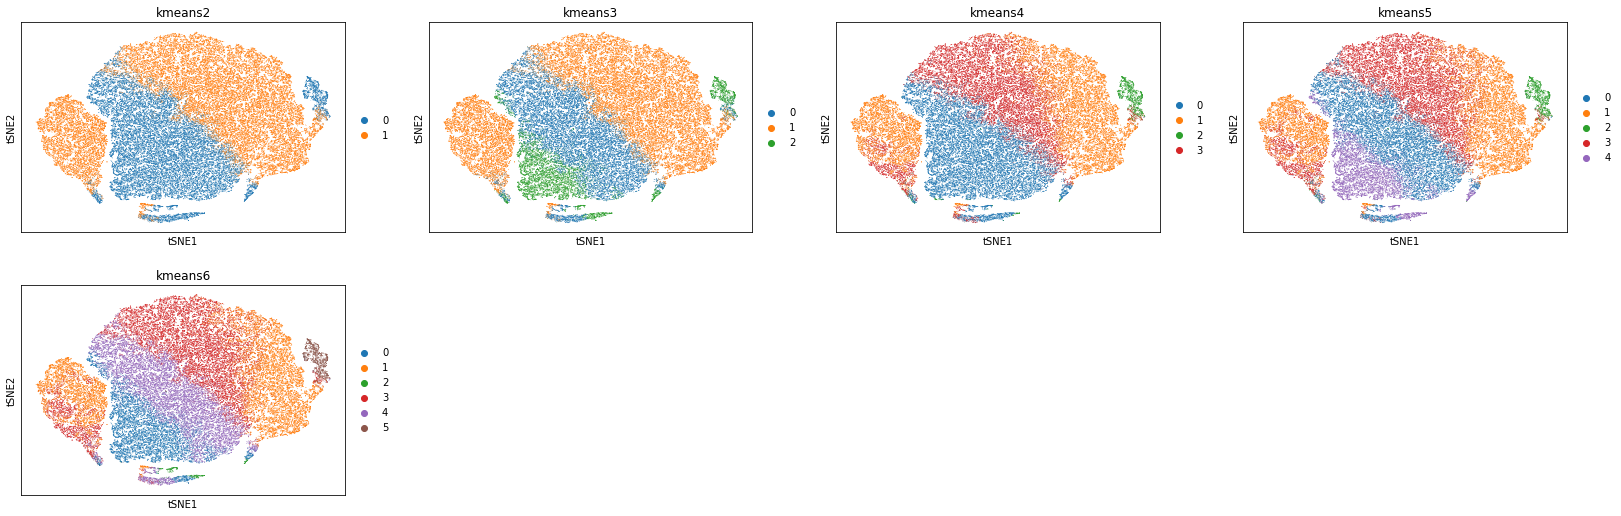

In [37]:
# extract pca coordinates
X_pca_harmony = adata.obsm['X_pca_harmony']

# kmeans for k = 2,3,4,5,6
for i in range(2,7):
    kmeans = KMeans(n_clusters = i, random_state = 0).fit(X_pca_harmony)
    adata.obs[f'kmeans{i}'] = kmeans.labels_.astype(str)
    
# tSNE projection colored by cluster IDs
sc.pl.tsne(adata, color = ['kmeans2','kmeans3','kmeans4','kmeans5','kmeans6'])

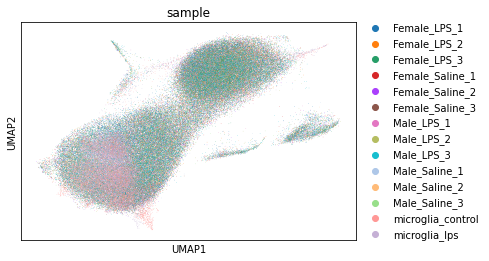

In [38]:
# nearest neighbors
sc.pp.neighbors(adata, n_neighbors = 15, use_rep = 'X_pca_harmony', metric = 'manhattan')

sc.tl.umap(adata)
sc.pl.umap(adata, color='sample')

# leiden clustering
sc.tl.leiden(adata, resolution = 0.3)

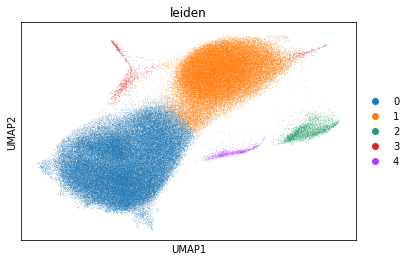

In [39]:
sc.pl.umap(
    adata, color = 'leiden',
    palette = sc.pl.palettes.vega_20_scanpy
)

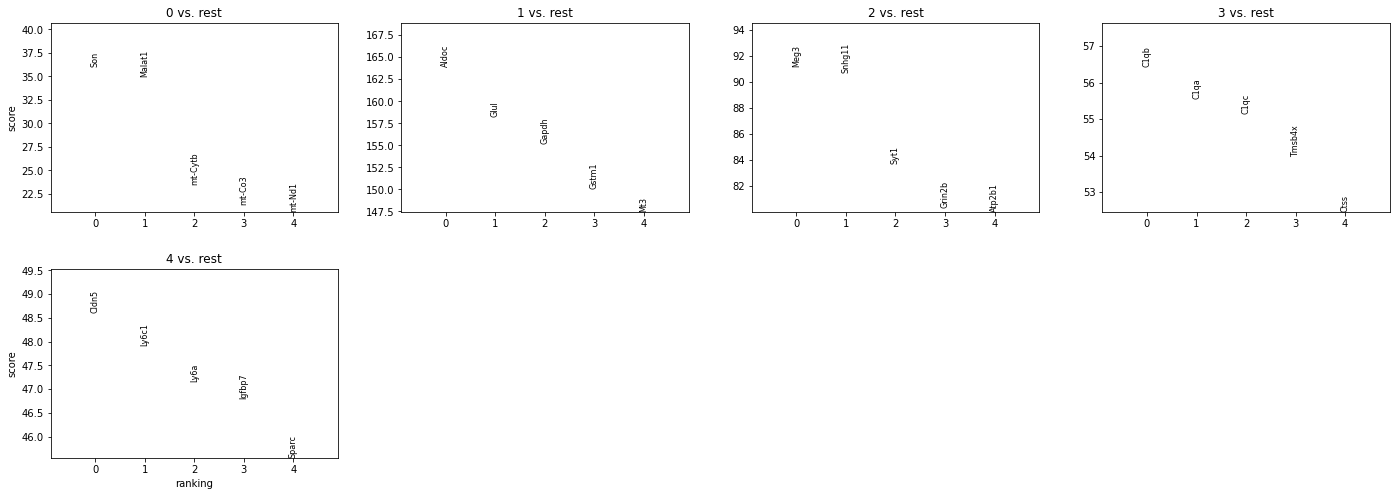

In [43]:
# DEGS
sc.tl.rank_genes_groups(adata, 'leiden', method = 'wilcoxon', key_added = "wilcoxon")
sc.pl.rank_genes_groups(adata, n_genes = 5, sharey = False, key = "wilcoxon")

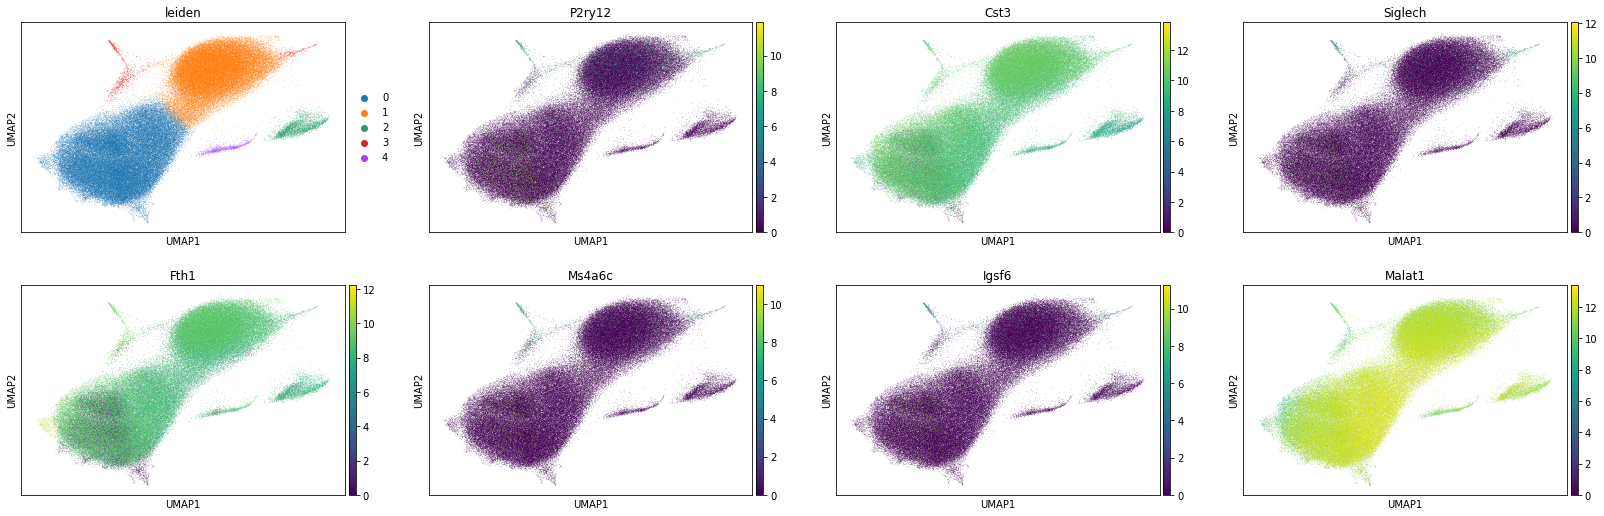

In [45]:
sc.pl.umap(adata, color=['leiden',"P2ry12", "Cst3", "Siglech", "Fth1", "Ms4a6c","Igsf6", "Malat1"])

In [46]:
adata

AnnData object with n_obs × n_vars = 132045 × 12623
    obs: 'group', 'sample', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'kmeans2', 'kmeans3', 'kmeans4', 'kmeans5', 'kmeans6'
    var: 'gene_ids-0', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'mt', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'tsne', 'sample_colors', 'neighbors', 'leiden', 'leiden_colors', 'kmeans2_colors', 'kmeans3_colors', 'kmeans4_colors', 'kmeans5_colors', 'kmeans6_colors', 'umap', 'wilcoxon'
    obsm: 'X_pca', 'X_tsne', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'